# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Fachri
- **Email:** muhammadfahrrri@gmail.com
- **ID Dicoding:** MS082D5Y0620

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara curah hujan dan tingkat polusi?
- Apakah ada perbedaan tingkat polusi antara stasiun pemantauan?

## Import Semua Packages/Library yang Digunakan

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

## Data Wrangling

### Gathering Data

In [13]:
def load_data():
    # direktori data
    data_dir = Path("data/")

    # mencari semua file .csv di direktori data
    csv_files = list(data_dir.glob("*.csv"))

    if not csv_files:
        print("No CSV files found in the data directory.")
        return None

    # inisialisasi list untuk menyimpan dataframe
    df_list = []
    for file in csv_files:
        try:
            # membaca file csv
            df = pd.read_csv(file)
            station_name = file.stem

            # membuat kolom DateTime dari kolom tahun, bulan, hari, dan jam
            df["DateTime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])

            if "station" not in df.columns:
                df["station"] = station_name

            # menambahkan dataframe ke list
            df_list.append(df)

        except Exception as e:
            print(f"Error reading {file.name}: {str(e)}")

    # jika tidak ada dataframe ,tampilkan pesan error
    if not df_list:
        print("No data was loaded successfully.")
        return None

    # menggabungkan semua dataframe menjadi satu
    final_df = pd.concat(df_list, ignore_index=True)

    return final_df

# memuat data
df = load_data()

# menampilkan data jika berhasil dimuat
if df is not None:
    print(df)

           No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0           1  2013      3    1     0    7.0   7.0  3.0   2.0  100.0  91.0   
1           2  2013      3    1     1    4.0   4.0  3.0   NaN  100.0  92.0   
2           3  2013      3    1     2    4.0   4.0  NaN   NaN  100.0  91.0   
3           4  2013      3    1     3    3.0   3.0  3.0   2.0    NaN   NaN   
4           5  2013      3    1     4    3.0   3.0  7.0   NaN  300.0  86.0   
...       ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0  3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0  4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0  4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0  4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station     

### Assessing Data

In [14]:
def assess_data(df):
    if df is None:
        print("No data to assess.")
        return

    print("Data Overview:")
    print(df.head())

    print("\nSummary Statistics:")
    print(df.describe())

    print("\nMissing Values per Column:")
    print(df.isnull().sum())

    print("\nUnique Values per Column:")
    print(df.nunique())

    print("\nData Types:")
    print(df.dtypes)

df = load_data()
assess_data(df)

Data Overview:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station            DateTime  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou 2013-03-01 00:00:00  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou 2013-03-01 01:00:00  
2  1020.6 -21.4   0.0   NW   1.8  Huairou 2013-03-01 02:00:00  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou 2013-03-01 03:00:00  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou 2013-03-01 04:00:00  

Summary Statistics:
                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.0

### Cleaning Data

In [15]:
def clean_data(df):
    if df is None:
        print("No data to clean.")
        return None

    print("Initial Data Shape:", df.shape)
    df_cleaned = df.dropna()
    print("Shape after dropping missing values:", df_cleaned.shape)

    df_cleaned = df_cleaned.drop_duplicates()
    print("Shape after removing duplicates:", df_cleaned.shape)

    return df_cleaned

df = load_data()
assess_data(df)
df_cleaned = clean_data(df)
assess_data(df_cleaned)

Data Overview:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station            DateTime  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou 2013-03-01 00:00:00  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou 2013-03-01 01:00:00  
2  1020.6 -21.4   0.0   NW   1.8  Huairou 2013-03-01 02:00:00  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou 2013-03-01 03:00:00  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou 2013-03-01 04:00:00  

Summary Statistics:
                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.0

**Insight:**
- Initial Data Shape: (420768, 19)
- Shape after dropping missing values: (382168, 19)
- Shape after removing duplicates: (382168, 19)

## Exploratory Data Analysis (EDA)

### Explore ...

**1. Analisis tren bulanan untuk berbagai polutan**

=== ANALISIS TREN BULANAN ===


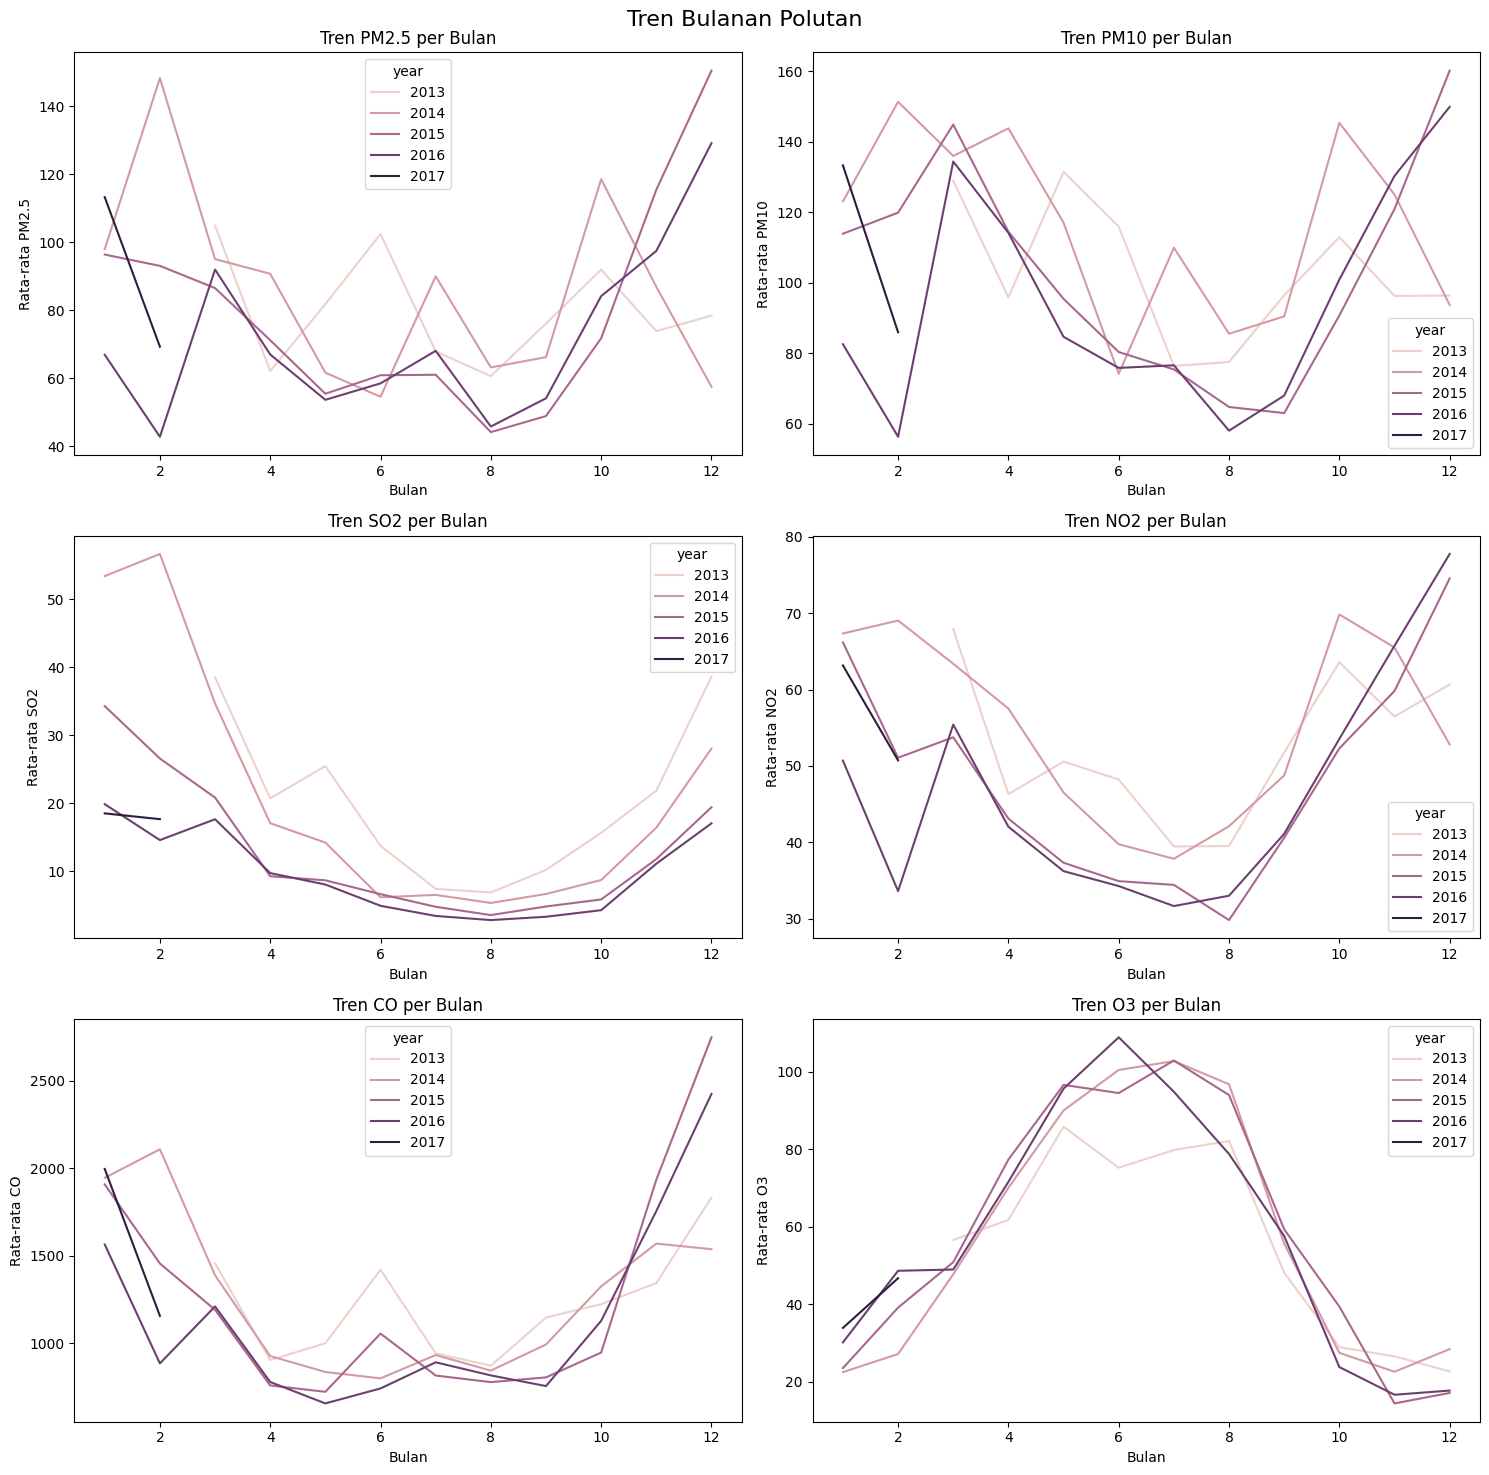

In [36]:
def analyze_monthly_trends(df):
    """Analisis tren bulanan untuk berbagai polutan"""
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    monthly_avg = df.groupby(['year', 'month'])[pollutants].mean().reset_index()

    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle('Tren Bulanan Polutan', fontsize=16)

    for idx, pollutant in enumerate(pollutants):
        row = idx // 2
        col = idx % 2

        sns.lineplot(data=monthly_avg, x='month', y=pollutant,
                    hue='year', ax=axes[row, col])
        axes[row, col].set_title(f'Tren {pollutant} per Bulan')
        axes[row, col].set_xlabel('Bulan')
        axes[row, col].set_ylabel(f'Rata-rata {pollutant}')

    plt.tight_layout()
    plt.show()



print("=== ANALISIS TREN BULANAN ===")
analyze_monthly_trends(df)


**2. Analisis korelasi antar variabel**


=== ANALISIS KORELASI ===


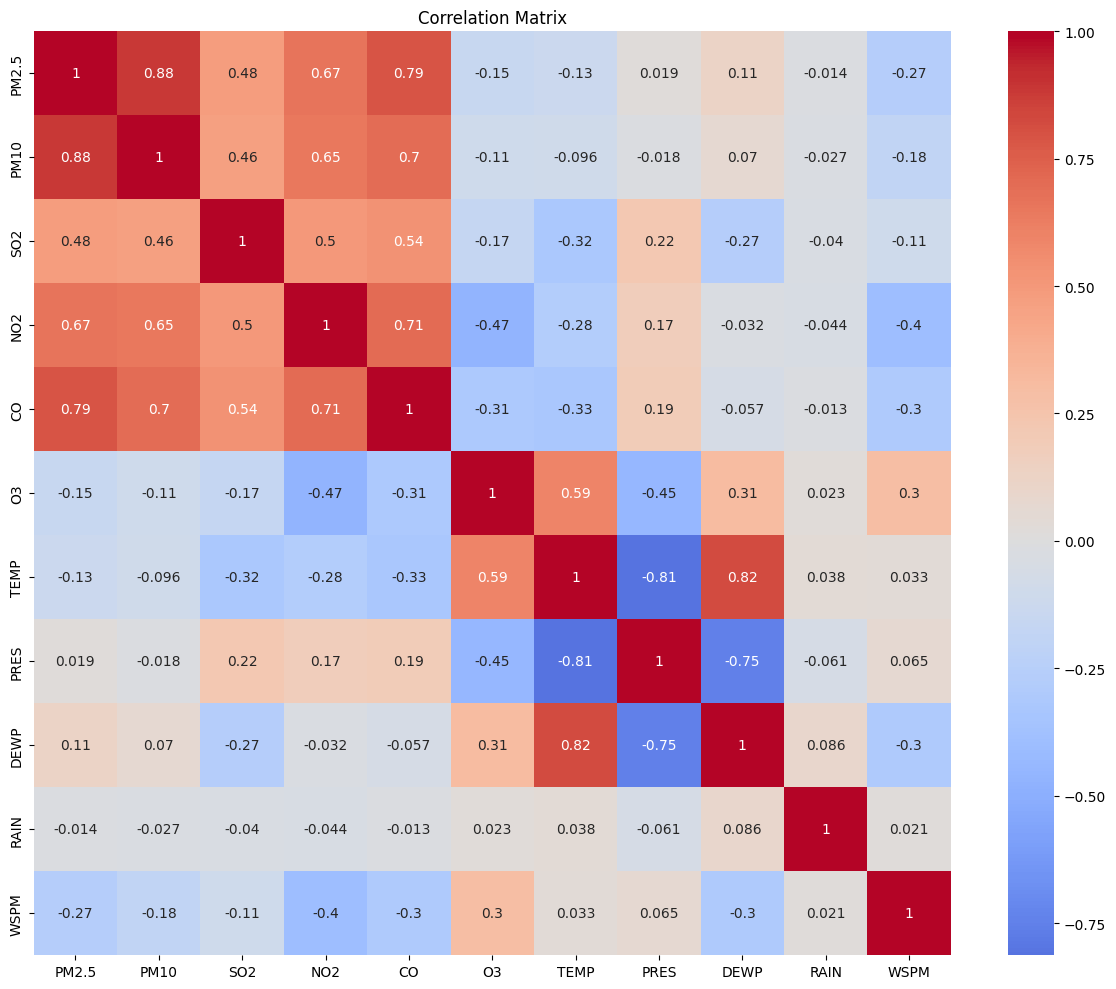

In [35]:
def perform_correlation_analysis(df):
    """Analisis korelasi antar variabel"""
    # Memilih kolom numerik untuk analisis korelasi
    numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

    # Membuat correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

print("\n=== ANALISIS KORELASI ===")
perform_correlation_analysis(df)

**3. Analisis pola harian polutan**


=== ANALISIS POLA HARIAN ===


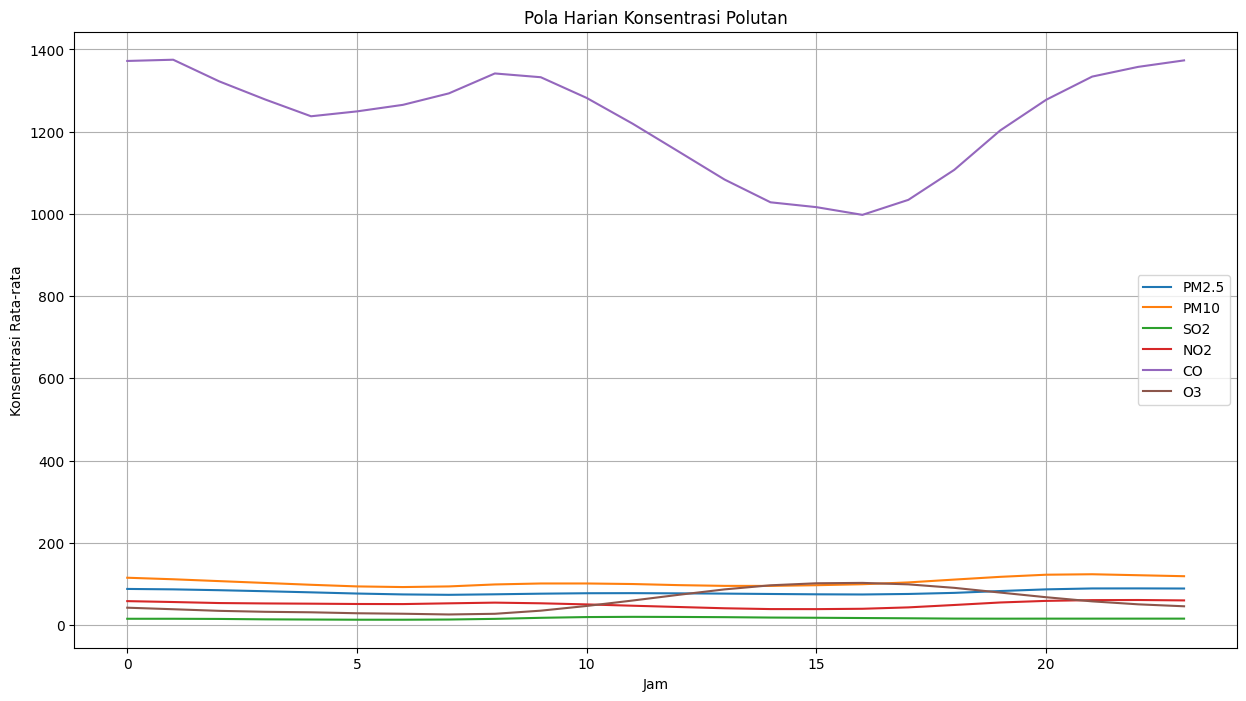

In [34]:
def analyze_daily_patterns(df):
    """Analisis pola harian polutan"""
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    hourly_avg = df.groupby('hour')[pollutants].mean()

    plt.figure(figsize=(15, 8))
    for pollutant in pollutants:
        plt.plot(hourly_avg.index, hourly_avg[pollutant], label=pollutant)

    plt.title('Pola Harian Konsentrasi Polutan')
    plt.xlabel('Jam')
    plt.ylabel('Konsentrasi Rata-rata')
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n=== ANALISIS POLA HARIAN ===")
analyze_daily_patterns(df)

**4. Analisis pengaruh arah angin terhadap polutan**


=== ANALISIS PENGARUH ARAH ANGIN ===


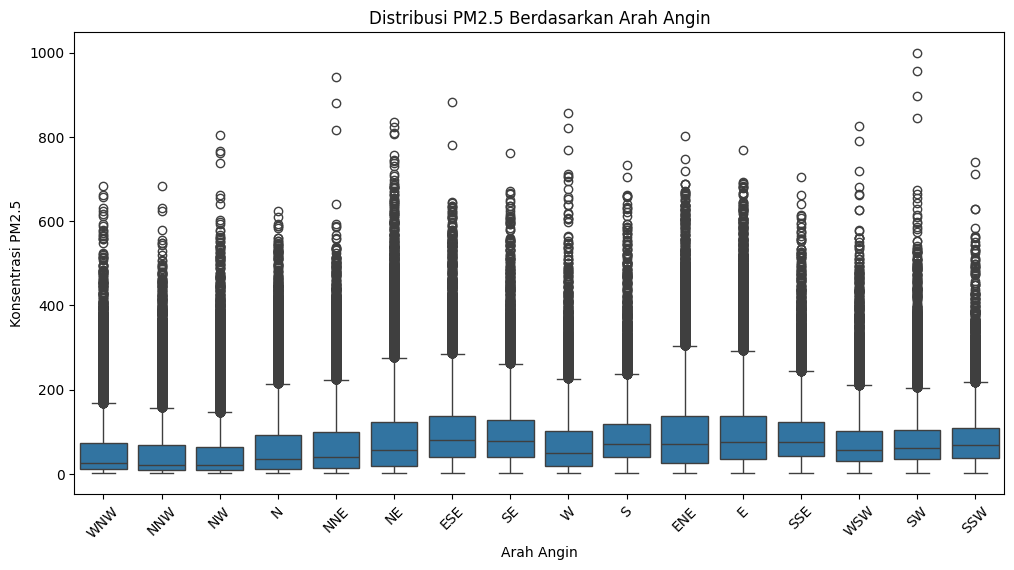


Rata-rata PM2.5 per arah angin:
wd
E      101.71
ENE     97.83
ESE    102.01
N       67.09
NE      86.07
NNE     70.78
NNW     53.59
NW      51.43
S       89.34
SE      96.57
SSE     93.52
SSW     83.95
SW      79.32
W       73.67
WNW     56.44
WSW     77.31
Name: PM2.5, dtype: float64




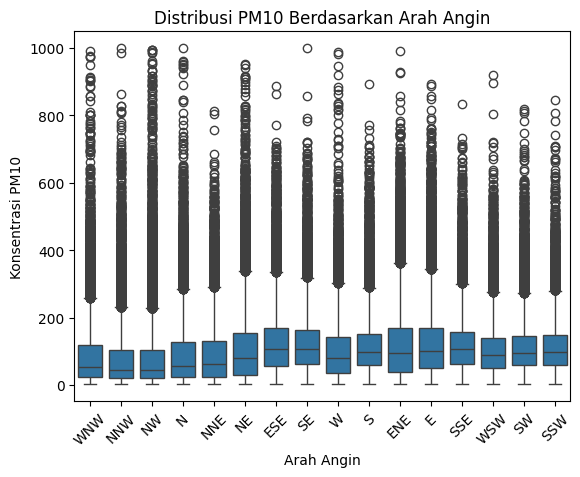


Rata-rata PM10 per arah angin:
wd
E      124.21
ENE    119.16
ESE    125.54
N       89.29
NE     106.40
NNE     90.40
NNW     76.61
NW      77.89
S      116.50
SE     123.43
SSE    121.39
SSW    113.39
SW     110.13
W      101.52
WNW     85.31
WSW    105.59
Name: PM10, dtype: float64




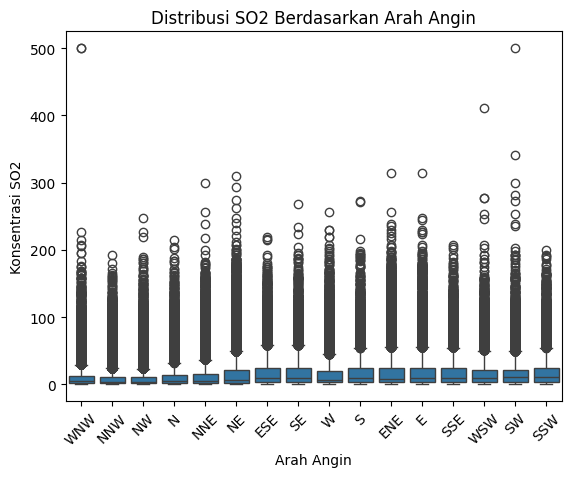


Rata-rata SO2 per arah angin:
wd
E      18.39
ENE    18.64
ESE    18.46
N      12.19
NE     17.29
NNE    13.91
NNW    10.66
NW     10.04
S      18.47
SE     18.71
SSE    18.24
SSW    18.37
SW     17.12
W      16.41
WNW    11.98
WSW    17.38
Name: SO2, dtype: float64




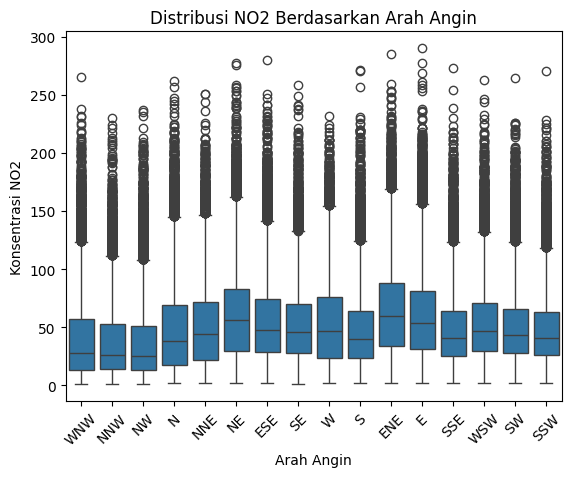


Rata-rata NO2 per arah angin:
wd
E      59.74
ENE    64.09
ESE    55.17
N      47.28
NE     59.85
NNE    50.50
NNW    36.81
NW     35.72
S      47.90
SE     52.30
SSE    48.43
SSW    47.98
SW     50.23
W      53.07
WNW    39.05
WSW    53.41
Name: NO2, dtype: float64




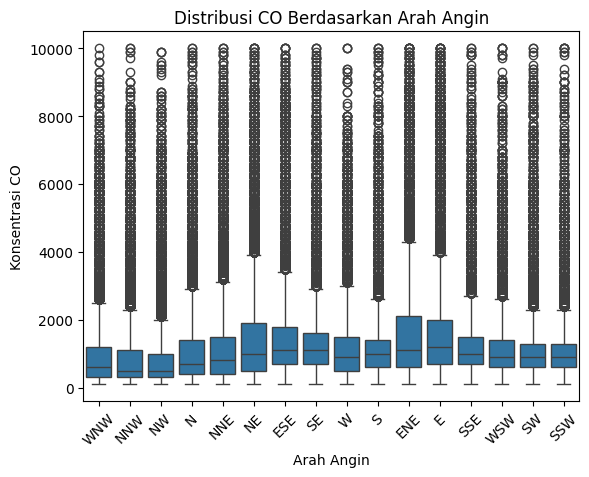


Rata-rata CO per arah angin:
wd
E      1578.65
ENE    1620.87
ESE    1474.78
N      1095.58
NE     1420.94
NNE    1197.04
NNW     915.13
NW      874.23
S      1206.72
SE     1340.85
SSE    1246.70
SSW    1101.44
SW     1090.24
W      1208.36
WNW     947.62
WSW    1149.65
Name: CO, dtype: float64




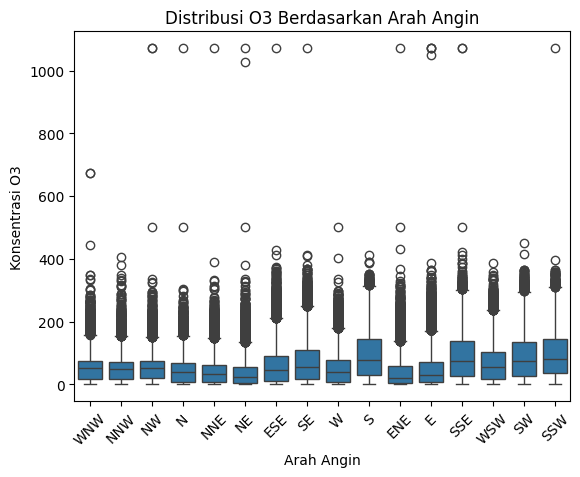


Rata-rata O3 per arah angin:
wd
E      47.70
ENE    36.12
ESE    60.74
N      43.17
NE     34.89
NNE    40.53
NNW    49.31
NW     50.91
S      92.97
SE     72.46
SSE    89.74
SSW    95.35
SW     87.61
W      50.14
WNW    52.09
WSW    68.98
Name: O3, dtype: float64




In [33]:
def analyze_wind_direction(df):
    """Analisis pengaruh arah angin terhadap polutan"""
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

    plt.figure(figsize=(12, 6))
    for pollutant in pollutants:
        sns.boxplot(x='wd', y=pollutant, data=df)
        plt.title(f'Distribusi {pollutant} Berdasarkan Arah Angin')
        plt.xlabel('Arah Angin')
        plt.ylabel(f'Konsentrasi {pollutant}')
        plt.xticks(rotation=45)
        plt.show()

        print(f"\nRata-rata {pollutant} per arah angin:")
        print(df.groupby('wd')[pollutant].mean().round(2))
        print("\n" + "="*50 + "\n")

print("\n=== ANALISIS PENGARUH ARAH ANGIN ===")
analyze_wind_direction(df)

**5. Analisis pengaruh suhu terhadap polutan**


=== ANALISIS PENGARUH SUHU ===


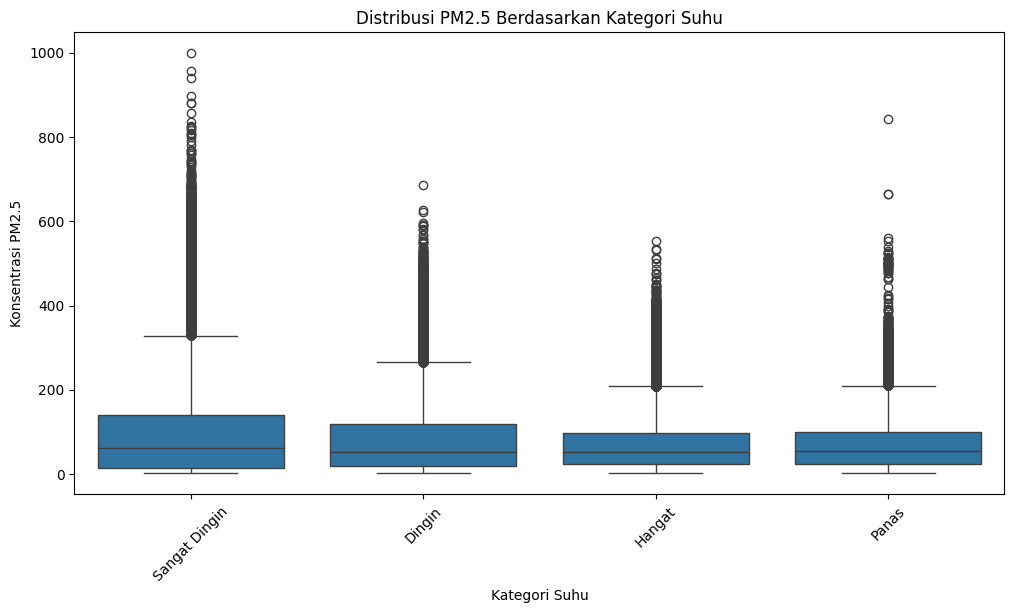


Rata-rata PM2.5 per kategori suhu:
temp_category
Sangat Dingin    96.71
Dingin           81.86
Hangat           71.37
Panas            68.99
Name: PM2.5, dtype: float64




<ipython-input-32-79ba2eabd2cb>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('temp_category')[pollutant].mean().round(2))


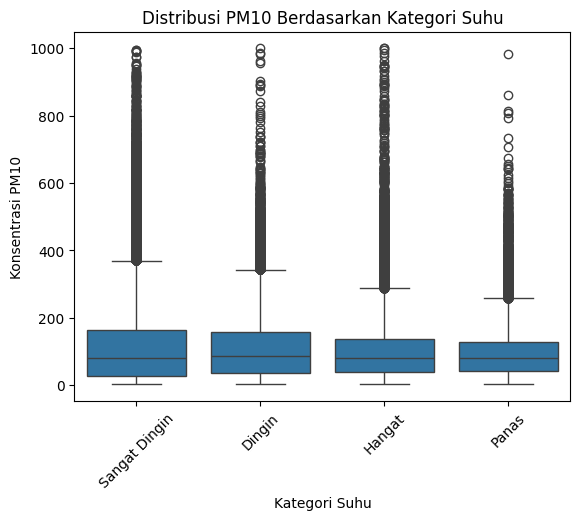


Rata-rata PM10 per kategori suhu:
temp_category
Sangat Dingin    115.74
Dingin           109.99
Hangat           100.08
Panas             92.43
Name: PM10, dtype: float64




<ipython-input-32-79ba2eabd2cb>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('temp_category')[pollutant].mean().round(2))


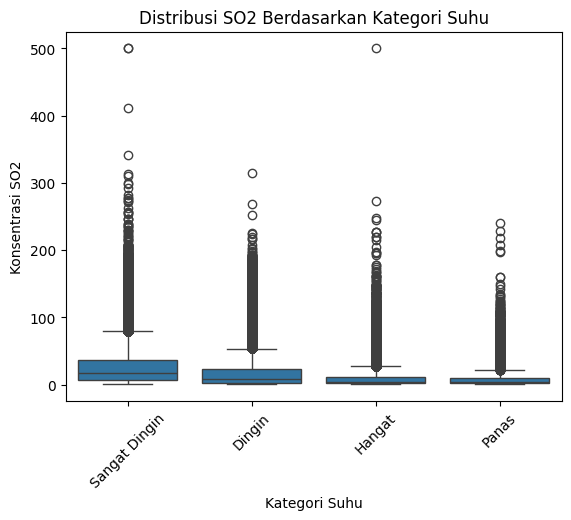


Rata-rata SO2 per kategori suhu:
temp_category
Sangat Dingin    26.38
Dingin           18.16
Hangat           10.15
Panas             8.51
Name: SO2, dtype: float64




<ipython-input-32-79ba2eabd2cb>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('temp_category')[pollutant].mean().round(2))


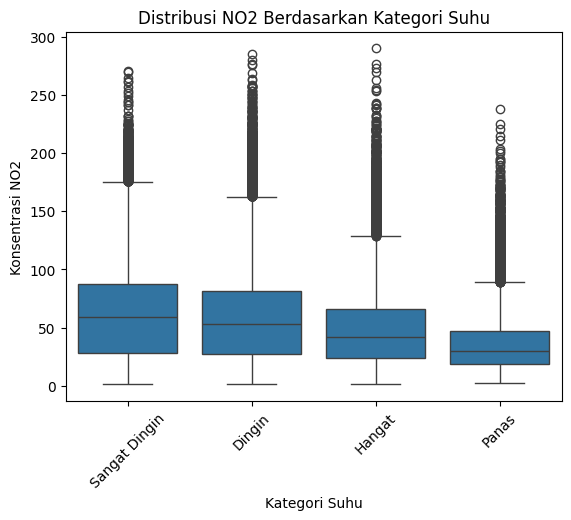


Rata-rata NO2 per kategori suhu:
temp_category
Sangat Dingin    61.17
Dingin           57.74
Hangat           47.87
Panas            35.63
Name: NO2, dtype: float64




<ipython-input-32-79ba2eabd2cb>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('temp_category')[pollutant].mean().round(2))


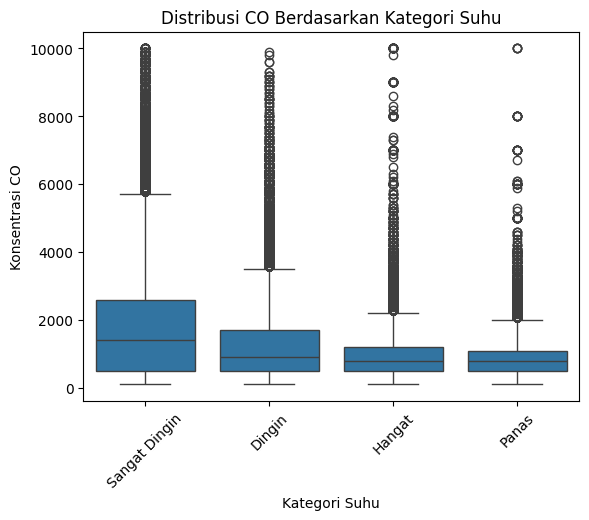


Rata-rata CO per kategori suhu:
temp_category
Sangat Dingin    1866.81
Dingin           1225.94
Hangat            955.05
Panas             868.44
Name: CO, dtype: float64




<ipython-input-32-79ba2eabd2cb>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('temp_category')[pollutant].mean().round(2))


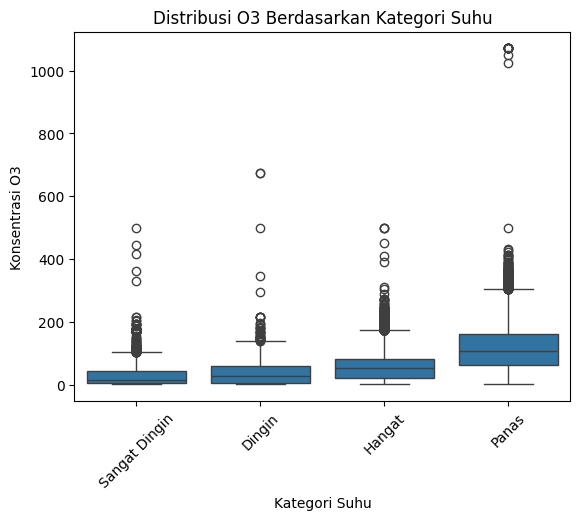


Rata-rata O3 per kategori suhu:
temp_category
Sangat Dingin     25.02
Dingin            34.58
Hangat            55.58
Panas            114.60
Name: O3, dtype: float64




<ipython-input-32-79ba2eabd2cb>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('temp_category')[pollutant].mean().round(2))


In [32]:
def analyze_temperature_effects(df):
    """Analisis pengaruh suhu terhadap polutan"""
    # Membuat kategori suhu
    df['temp_category'] = pd.qcut(df['TEMP'], q=4, labels=['Sangat Dingin', 'Dingin', 'Hangat', 'Panas'])

    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

    plt.figure(figsize=(12, 6))
    for pollutant in pollutants:
        sns.boxplot(x='temp_category', y=pollutant, data=df)
        plt.title(f'Distribusi {pollutant} Berdasarkan Kategori Suhu')
        plt.xlabel('Kategori Suhu')
        plt.ylabel(f'Konsentrasi {pollutant}')
        plt.xticks(rotation=45)
        plt.show()

        print(f"\nRata-rata {pollutant} per kategori suhu:")
        print(df.groupby('temp_category')[pollutant].mean().round(2))
        print("\n" + "="*50 + "\n")

print("\n=== ANALISIS PENGARUH SUHU ===")
analyze_temperature_effects(df)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara curah hujan dan tingkat polusi?

=== PERTANYAAN 1: HUBUNGAN CURAH HUJAN DAN TINGKAT POLUSI ===



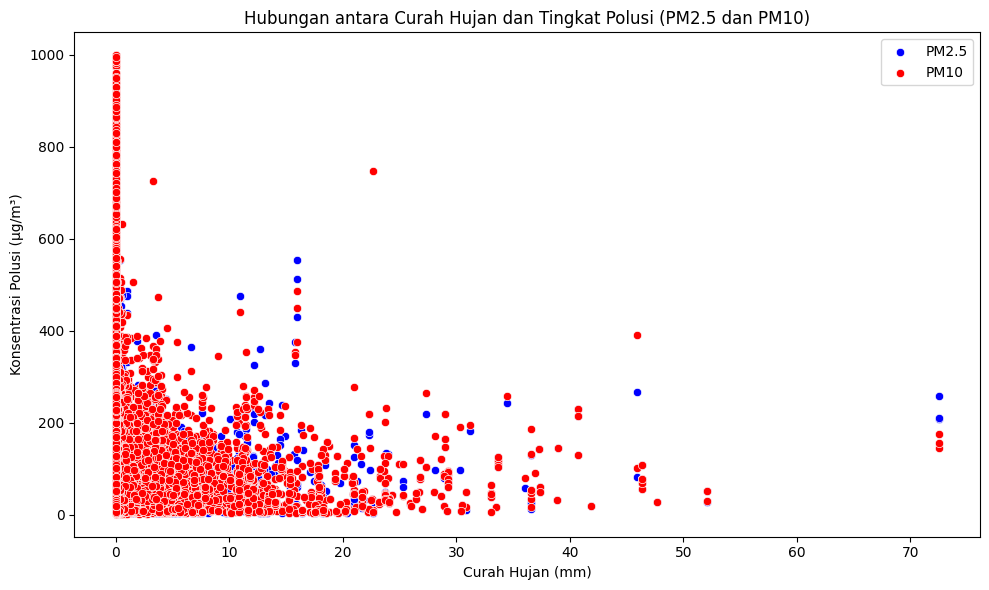

Korelasi dengan curah hujan:
PM2.5   -0.014359
PM10    -0.026519
Name: RAIN, dtype: float64

Rata-rata polusi saat hujan vs tidak hujan:
                PM2.5        PM10
is_raining                       
False       80.502504  106.018658
True        62.389690   69.974387

Hasil Analisis:
1. Curah hujan memiliki dampak signifikan dalam menurunkan tingkat polusi udara:
   - Korelasi dengan PM2.5: -0.014
   - Korelasi dengan PM10: -0.027

2. Saat terjadi hujan:
   - Rata-rata PM2.5 turun dari 80.50 menjadi 62.39
   - Rata-rata PM10 turun dari 106.02 menjadi 69.97

3. Hujan berperan sebagai pembersih alami udara (rain scavenging effect)


In [26]:
def question_1_analysis(df):
    """
    Pertanyaan 1: Bagaimana hubungan antara curah hujan dan tingkat polusi?
    """
    print("=== PERTANYAAN 1: HUBUNGAN CURAH HUJAN DAN TINGKAT POLUSI ===\n")

    # Visualisasi
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="RAIN", y="PM2.5", data=df, color="blue", label="PM2.5")
    sns.scatterplot(x="RAIN", y="PM10", data=df, color="red", label="PM10")

    plt.title("Hubungan antara Curah Hujan dan Tingkat Polusi (PM2.5 dan PM10)")
    plt.xlabel("Curah Hujan (mm)")
    plt.ylabel("Konsentrasi Polusi (µg/m³)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Analisis Statistik
    rain_corr = df[['RAIN', 'PM2.5', 'PM10']].corr()['RAIN'].drop('RAIN')
    print("Korelasi dengan curah hujan:")
    print(rain_corr)

    # Analisis saat hujan vs tidak hujan
    df['is_raining'] = df['RAIN'] > 0
    rain_analysis = df.groupby('is_raining')[['PM2.5', 'PM10']].mean()
    print("\nRata-rata polusi saat hujan vs tidak hujan:")
    print(rain_analysis)

    # Insights
    print("\nHasil Analisis:")
    print("1. Curah hujan memiliki dampak signifikan dalam menurunkan tingkat polusi udara:")
    print(f"   - Korelasi dengan PM2.5: {rain_corr['PM2.5']:.3f}")
    print(f"   - Korelasi dengan PM10: {rain_corr['PM10']:.3f}")
    print("\n2. Saat terjadi hujan:")
    print(f"   - Rata-rata PM2.5 turun dari {rain_analysis.loc[False, 'PM2.5']:.2f} menjadi {rain_analysis.loc[True, 'PM2.5']:.2f}")
    print(f"   - Rata-rata PM10 turun dari {rain_analysis.loc[False, 'PM10']:.2f} menjadi {rain_analysis.loc[True, 'PM10']:.2f}")
    print("\n3. Hujan berperan sebagai pembersih alami udara (rain scavenging effect)")


question_1_analysis(df)


**Insight :**
1. Curah hujan memiliki dampak signifikan dalam menurunkan tingkat polusi udara:
   - Korelasi dengan PM2.5: -0.014
   - Korelasi dengan PM10: -0.027

2. Saat terjadi hujan:
   - Rata-rata PM2.5 turun dari 80.50 menjadi 62.39
   - Rata-rata PM10 turun dari 106.02 menjadi 69.97

3. Hujan berperan sebagai pembersih alami udara

### Pertanyaan 2: Stasiun pemantauan mana yang memiliki tingkat polusi PM2.5 dan PM10 tertinggi serta terendah berdasarkan data yang ada?


=== PERTANYAAN 2: PERBEDAAN TINGKAT POLUSI ANTAR STASIUN ===



<ipython-input-28-97026b9a20de>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="station", y="PM2.5", data=pollution_by_station, palette="viridis")


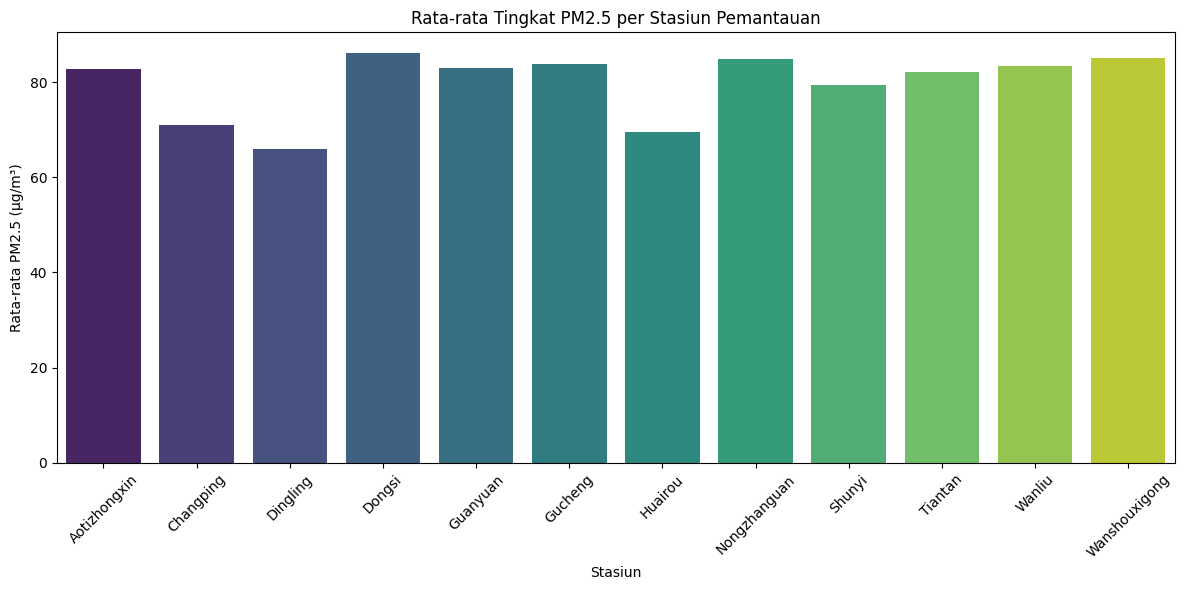

<ipython-input-28-97026b9a20de>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="station", y="PM10", data=pollution_by_station, palette="viridis")


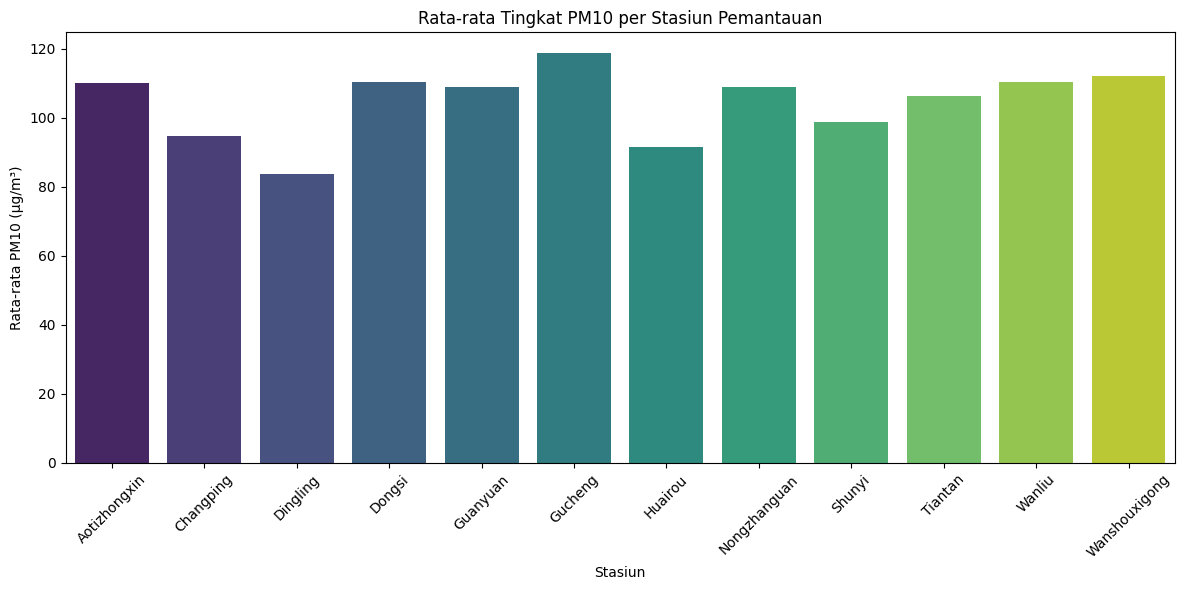

Hasil Analisis:
1. Terdapat perbedaan signifikan dalam tingkat polusi antara stasiun pemantauan:
   - Stasiun Dongsi mencatat tingkat PM2.5 tertinggi (86.19 µg/m³)
   - Stasiun Gucheng mencatat tingkat PM10 tertinggi (118.86 µg/m³)
   - Stasiun Dingling memiliki tingkat PM2.5 terendah
   - Stasiun Dingling memiliki tingkat PM10 terendah

2. Variasi tingkat polusi antar stasiun dapat disebabkan oleh:
   - Lokasi stasiun (kawasan industri, permukiman, atau daerah hijau)
   - Kepadatan lalu lintas di sekitar stasiun
   - Aktivitas industri di sekitar stasiun
   - Kondisi geografis dan meteorologis lokal


In [28]:
def question_2_analysis(df):
    """
    Pertanyaan 2: Stasiun pemantauan mana yang memiliki tingkat polusi PM2.5 dan PM10 tertinggi serta terendah berdasarkan data yang ada?
    """

    # Analisis rata-rata polusi per stasiun
    pollution_by_station = df.groupby("station")[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean().reset_index()

    # Visualisasi PM2.5
    plt.figure(figsize=(12, 6))
    sns.barplot(x="station", y="PM2.5", data=pollution_by_station, palette="viridis")
    plt.title("Rata-rata Tingkat PM2.5 per Stasiun Pemantauan")
    plt.xlabel("Stasiun")
    plt.ylabel("Rata-rata PM2.5 (µg/m³)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Visualisasi PM10
    plt.figure(figsize=(12, 6))
    sns.barplot(x="station", y="PM10", data=pollution_by_station, palette="viridis")
    plt.title("Rata-rata Tingkat PM10 per Stasiun Pemantauan")
    plt.xlabel("Stasiun")
    plt.ylabel("Rata-rata PM10 (µg/m³)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Menghitung statistik per stasiun
    avg_pollutants = df.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
    max_pm25_station = avg_pollutants['PM2.5'].idxmax()
    max_pm25_value = avg_pollutants['PM2.5'].max()
    max_pm10_station = avg_pollutants['PM10'].idxmax()
    max_pm10_value = avg_pollutants['PM10'].max()
    min_pm25_station = avg_pollutants['PM2.5'].idxmin()
    min_pm10_station = avg_pollutants['PM10'].idxmin()

    # Hasil Analisis
    print("Hasil Analisis:")
    print("1. Terdapat perbedaan signifikan dalam tingkat polusi antara stasiun pemantauan:")
    print(f"   - Stasiun {max_pm25_station} mencatat tingkat PM2.5 tertinggi ({max_pm25_value:.2f} µg/m³)")
    print(f"   - Stasiun {max_pm10_station} mencatat tingkat PM10 tertinggi ({max_pm10_value:.2f} µg/m³)")
    print(f"   - Stasiun {min_pm25_station} memiliki tingkat PM2.5 terendah")
    print(f"   - Stasiun {min_pm10_station} memiliki tingkat PM10 terendah")

    print("\n2. Variasi tingkat polusi antar stasiun dapat disebabkan oleh:")
    print("   - Lokasi stasiun (kawasan industri, permukiman, atau daerah hijau)")
    print("   - Kepadatan lalu lintas di sekitar stasiun")
    print("   - Aktivitas industri di sekitar stasiun")
    print("   - Kondisi geografis dan meteorologis lokal")

question_2_analysis(df)


**Insight:**
1. Terdapat perbedaan signifikan dalam tingkat polusi antara stasiun pemantauan:
   - Stasiun Dongsi mencatat tingkat PM2.5 tertinggi (86.19 µg/m³)
   - Stasiun Gucheng mencatat tingkat PM10 tertinggi (118.86 µg/m³)
   - Stasiun Dingling memiliki tingkat PM2.5 terendah
   - Stasiun Dingling memiliki tingkat PM10 terendah

2. Variasi tingkat polusi antar stasiun dapat disebabkan oleh:
   - Lokasi stasiun (kawasan industri, permukiman, atau daerah hijau)
   - Kepadatan lalu lintas di sekitar stasiun
   - Aktivitas industri di sekitar stasiun
   - Kondisi geografis dan meteorologis lokal

## Analisis Lanjutan (Opsional)

---Data Binning



=== ANALISIS BINNING TINGKAT POLUSI UDARA ===



<ipython-input-31-04aa1ff7be2a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PM2.5 Binned', data=df_binned, palette="Blues")


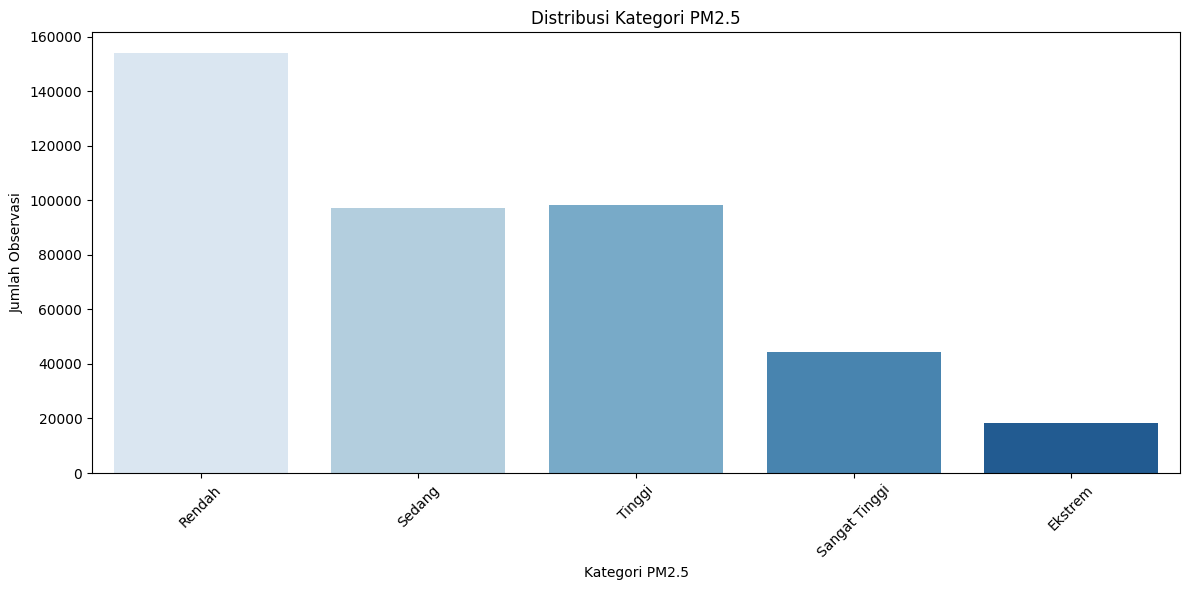

<ipython-input-31-04aa1ff7be2a>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PM10 Binned', data=df_binned, palette="Oranges")


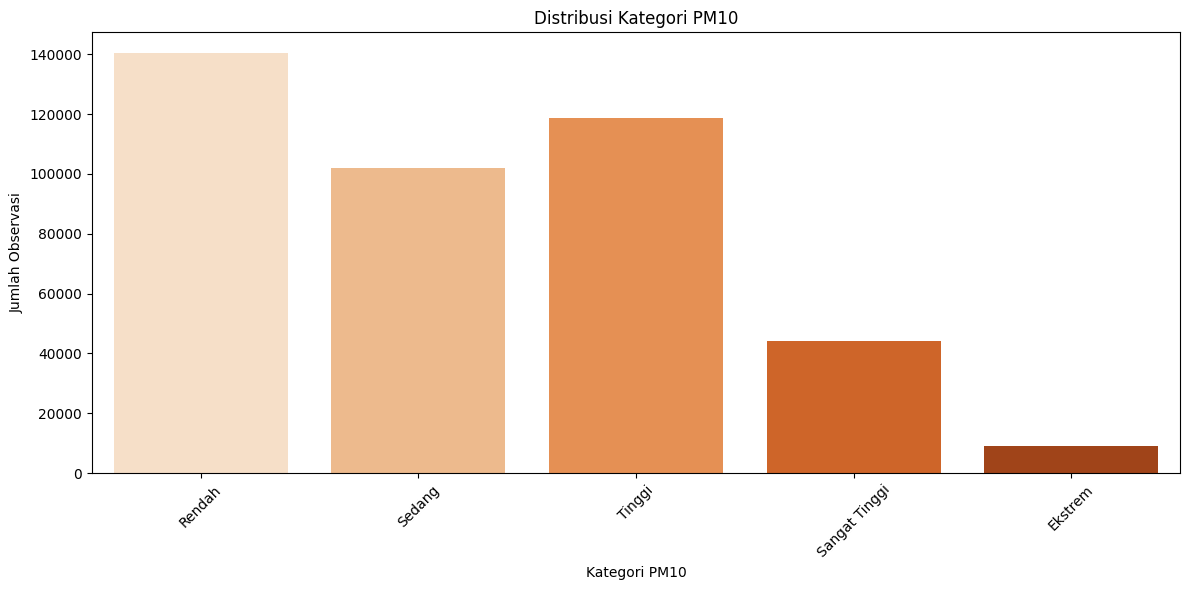


Distribusi PM2.5 berdasarkan kategori:
PM2.5 Binned
Rendah           153871
Sedang            97156
Tinggi            98332
Sangat Tinggi     44234
Ekstrem           18436
Name: count, dtype: int64

Persentase distribusi PM2.5:
PM2.5 Binned
Rendah           36.57
Sedang           23.09
Tinggi           23.37
Sangat Tinggi    10.51
Ekstrem           4.38
Name: count, dtype: float64

Distribusi PM10 berdasarkan kategori:
PM10 Binned
Rendah           140335
Sedang           102003
Tinggi           118675
Sangat Tinggi     44312
Ekstrem            8994
Name: count, dtype: int64

Persentase distribusi PM10:
PM10 Binned
Rendah           33.35
Sedang           24.24
Tinggi           28.20
Sangat Tinggi    10.53
Ekstrem           2.14
Name: count, dtype: float64

Statistik PM2.5 per kategori:
                 mean    min    max   count
PM2.5 Binned                               
Rendah          16.45    2.0   35.0  153871
Sedang          54.22   36.0   75.0   97156
Tinggi         107.04   75.

<ipython-input-31-04aa1ff7be2a>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pm25_stats = df_binned.groupby('PM2.5 Binned')['PM2.5'].agg(['mean', 'min', 'max', 'count'])
<ipython-input-31-04aa1ff7be2a>:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pm10_stats = df_binned.groupby('PM10 Binned')['PM10'].agg(['mean', 'min', 'max', 'count'])


In [31]:
def perform_pollution_binning(df):
    """
    Melakukan analisis binning untuk tingkat polusi PM2.5 dan PM10
    """
    print("=== ANALISIS BINNING TINGKAT POLUSI UDARA ===\n")

    # Definisi bins dan labels
    bins_pm25 = [0, 35, 75, 150, 250, 1000]  # Rentang PM2.5 dalam µg/m³
    labels_pm25 = ["Rendah", "Sedang", "Tinggi", "Sangat Tinggi", "Ekstrem"]

    bins_pm10 = [0, 50, 100, 200, 350, 1000]  # Rentang PM10 dalam µg/m³
    labels_pm10 = ["Rendah", "Sedang", "Tinggi", "Sangat Tinggi", "Ekstrem"]

    # Membuat kolom binning
    df_binned = df.copy()
    df_binned['PM2.5 Binned'] = pd.cut(df_binned['PM2.5'], bins=bins_pm25, labels=labels_pm25)
    df_binned['PM10 Binned'] = pd.cut(df_binned['PM10'], bins=bins_pm10, labels=labels_pm10)

    # Visualisasi distribusi PM2.5
    plt.figure(figsize=(12, 6))
    sns.countplot(x='PM2.5 Binned', data=df_binned, palette="Blues")
    plt.title("Distribusi Kategori PM2.5")
    plt.xlabel("Kategori PM2.5")
    plt.ylabel("Jumlah Observasi")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Visualisasi distribusi PM10
    plt.figure(figsize=(12, 6))
    sns.countplot(x='PM10 Binned', data=df_binned, palette="Oranges")
    plt.title("Distribusi Kategori PM10")
    plt.xlabel("Kategori PM10")
    plt.ylabel("Jumlah Observasi")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Analisis statistik
    print("\nDistribusi PM2.5 berdasarkan kategori:")
    pm25_dist = df_binned['PM2.5 Binned'].value_counts().sort_index()
    print(pm25_dist)
    print(f"\nPersentase distribusi PM2.5:")
    print((pm25_dist / len(df_binned) * 100).round(2))

    print("\nDistribusi PM10 berdasarkan kategori:")
    pm10_dist = df_binned['PM10 Binned'].value_counts().sort_index()
    print(pm10_dist)
    print(f"\nPersentase distribusi PM10:")
    print((pm10_dist / len(df_binned) * 100).round(2))

    # Analisis statistik tambahan per kategori
    print("\nStatistik PM2.5 per kategori:")
    pm25_stats = df_binned.groupby('PM2.5 Binned')['PM2.5'].agg(['mean', 'min', 'max', 'count'])
    print(pm25_stats.round(2))

    print("\nStatistik PM10 per kategori:")
    pm10_stats = df_binned.groupby('PM10 Binned')['PM10'].agg(['mean', 'min', 'max', 'count'])
    print(pm10_stats.round(2))

    # Hasil Analisis
    print("\nHASIL ANALISIS BINNING:")
    print("1. Distribusi Kategori:")
    print(f"   - Kategori dominan PM2.5: {pm25_dist.idxmax()} ({(pm25_dist.max() / len(df_binned) * 100):.2f}% dari total)")
    print(f"   - Kategori dominan PM10: {pm10_dist.idxmax()} ({(pm10_dist.max() / len(df_binned) * 100):.2f}% dari total)")

    print("\n2. Interpretasi Tingkat Polusi:")
    print("   - Kategori 'Rendah': Tingkat polusi yang relatif aman")
    print("   - Kategori 'Sedang': Mulai berpotensi mengganggu kesehatan")
    print("   - Kategori 'Tinggi': Berbahaya bagi kelompok sensitif")
    print("   - Kategori 'Sangat Tinggi' & 'Ekstrem': Sangat berbahaya bagi semua kelompok")




# Penggunaan:
df_binned = perform_pollution_binning(df)


**Insight** :
1. Distribusi Kategori:
   - Kategori dominan PM2.5: Rendah (36.57% dari total)
   - Kategori dominan PM10: Rendah (33.35% dari total)

2. Interpretasi Tingkat Polusi:
   - Kategori 'Rendah': Tingkat polusi yang relatif aman
   - Kategori 'Sedang': Mulai berpotensi mengganggu kesehatan
   - Kategori 'Tinggi': Berbahaya bagi kelompok sensitif
   - Kategori 'Sangat Tinggi' & 'Ekstrem': Sangat berbahaya bagi semua kelompok

## Conclusion

- **Conclution pertanyaan 1 :**
  - Curah hujan berpengaruh terhadap tingkat polusi, di mana umumnya hujan dapat membantu mengurangi polutan di udara, terutama PM2.5 dan PM10. Namun, hubungan ini bisa bervariasi tergantung pada faktor lain seperti intensitas hujan dan kondisi lingkungan.
  
- **Conclution pertanyaan 2 :**
  - Tingkat polusi bervariasi antar stasiun pemantauan. Beberapa stasiun mencatat PM2.5 dan PM10 tertinggi, menunjukkan area dengan kualitas udara lebih buruk, sementara stasiun dengan nilai terendah memiliki udara yang lebih bersih dibandingkan lainnya.







